In [1]:
from typing import List, Dict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import max_norm
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv("../data/titanic/train.csv")
test_df=pd.read_csv("../data/titanic/test.csv")

In [3]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [4]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

In [5]:
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column,axis=1,inplace=True)

In [6]:
all_data=[train_df,test_df]
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [7]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [8]:
## create bin for age features
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [9]:
## create bin for fare features
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [10]:
### for our reference making a copy of both DataSet start working for copy of dataset
traindf=train_df
testdf=test_df

In [11]:
all_dat=[traindf,testdf]
for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [12]:
drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)

In [13]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [14]:
testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [15]:
testdf.head(3)

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,893,3,1,0,2,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,894,2,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [16]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 22), (268, 22), (623,), (268,))

In [17]:
train_X = traindf.drop("Survived", axis=1)
train_Y=traindf["Survived"]
test_X  = testdf.drop("PassengerId", axis=1).copy()
# test_Y = testdf["Survived"]
train_X.shape, train_Y.shape, test_X.shape

((891, 22), (891,), (418, 22))

In [18]:
model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-10-27 22:05:12.425304: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-27 22:05:12.425484: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
def create_history(columns: int, nodes: int) -> Dict:
    return {i:{j: [] for j in range(nodes)} for i in range(columns)}

In [20]:
COLUMNS = list(train_X.columns)
COLUMNS

['Pclass',
 'SibSp',
 'Parch',
 'FamilySize',
 'Sex_female',
 'Sex_male',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare',
 'Age_type_Children',
 'Age_type_Teenage',
 'Age_type_Adult',
 'Age_type_Elder',
 'Em_type_C',
 'Em_type_Q',
 'Em_type_S',
 'Fare_type_Low_fare',
 'Fare_type_median_fare',
 'Fare_type_Average_fare',
 'Fare_type_high_fare']

In [21]:
history = create_history(len(COLUMNS), 6)
history

{0: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 1: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 2: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 3: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 4: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 5: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 6: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 7: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 8: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 9: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 10: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 11: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 12: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 13: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 14: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 15: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 16: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 17: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 18: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 19: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
 20: {0: [], 1: [], 2: [], 3: 

In [22]:
for epoch in range(1, 501):
    print(f"RUNNING EPOCH {epoch}")
    hist = model.fit(x=train_X, 
      y=train_Y, 
      epochs=1,
      batch_size=100,
      # validation_data=(test_X, test), 
      )
    all_weights = model.layers[0].get_weights()[0].tolist()
    for column in range(len(all_weights)):
        for node in range(len(all_weights[column])):
            history[column][node].append(all_weights[column][node])

RUNNING EPOCH 1


2022-10-27 22:05:25.722707: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-27 22:05:26.057474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 1s 18ms/step - loss: 0.6936 - accuracy: 0.5836
RUNNING EPOCH 2
9/9 [==============================] - 0s 9ms/step - loss: 0.6910 - accuracy: 0.6139
RUNNING EPOCH 3
9/9 [==============================] - 0s 9ms/step - loss: 0.6889 - accuracy: 0.6207
RUNNING EPOCH 4
9/9 [==============================] - 0s 9ms/step - loss: 0.6871 - accuracy: 0.6251
RUNNING EPOCH 5
9/9 [==============================] - 0s 9ms/step - loss: 0.6854 - accuracy: 0.6274
RUNNING EPOCH 6
9/9 [==============================] - 0s 9ms/step - loss: 0.6838 - accuracy: 0.6274
RUNNING EPOCH 7
9/9 [==============================] - 0s 9ms/step - loss: 0.6822 - accuracy: 0.6285
RUNNING EPOCH 8
9/9 [==============================] - 0s 9ms/step - loss: 0.6805 - accuracy: 0.6285
RUNNING EPOCH 9
9/9 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.6364
RUNNING EPOCH 10
9/9 [==============================] - 0s 8ms/step - loss: 0.6761 - accuracy: 0.6386
RUNN

In [23]:
def get_groups(index: int, nodes: int) -> List:
    group = []
    for i in range(nodes):
        group.append(history[index][i])
    return group

In [24]:
COLUMNS

['Pclass',
 'SibSp',
 'Parch',
 'FamilySize',
 'Sex_female',
 'Sex_male',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare',
 'Age_type_Children',
 'Age_type_Teenage',
 'Age_type_Adult',
 'Age_type_Elder',
 'Em_type_C',
 'Em_type_Q',
 'Em_type_S',
 'Fare_type_Low_fare',
 'Fare_type_median_fare',
 'Fare_type_Average_fare',
 'Fare_type_high_fare']

In [25]:
Pclass = get_groups(0, 6)
SibSp = get_groups(1, 6)
Parch = get_groups(2, 6)
FamilySize = get_groups(3, 6)
Sex_female = get_groups(4, 6)
Sex_male = get_groups(5, 6)
Title_Master = get_groups(6, 6)
Title_Miss = get_groups(7, 6)
Title_Mr = get_groups(8, 6)
Title_Mrs = get_groups(9, 6)
Title_Rare = get_groups(10, 6)
Age_type_Children = get_groups(11, 6)
Age_type_Teenage = get_groups(12, 6)
Age_type_Adult = get_groups(13, 6)
Age_type_Elder = get_groups(14, 6)
Em_type_C = get_groups(15, 6)
Em_type_Q = get_groups(16, 6)
Em_type_S = get_groups(17, 6)
Fare_type_Low_fare = get_groups(18, 6)
Fare_type_median_fare = get_groups(19, 6)
Fare_type_Average_fare = get_groups(20, 6)
Fare_type_high_fare = get_groups(21, 6)

In [26]:
light = "#90CCF4"
darker = "#5DA2D5"
important = "#F3D250"
noise = "#F78888"
other = "#ECECEC"

In [27]:
def generate_box_plot(ax, data: List, color: str, label: str, position_offset: int = 0, showfliers: bool = False):
    ax.set_xlabel("Input Column and Node Number")
    ax.set_ylabel("Weight Values")
    color = {"color": color}
    ax.boxplot(
        data,
        positions=[i + position_offset for i in range(1,7)],
        boxprops=color,
        medianprops=color,
        whiskerprops=color,
        capprops=color,
        flierprops={"markeredgecolor": other},
        showfliers=showfliers,
        labels=[f"{label}{i}" for i in range(1,7)]
    )

In [28]:
all_fields = [
    Pclass,
    SibSp,
    Parch,
    FamilySize,
    Sex_female,
    Sex_male,
    Title_Master,
    Title_Miss,
    Title_Mr,
    Title_Mrs,
    Title_Rare,
    Age_type_Children,
    Age_type_Teenage,
    Age_type_Adult,
    Age_type_Elder,
    Em_type_C,
    Em_type_Q,
    Em_type_S,
    Fare_type_Low_fare,
    Fare_type_median_fare,
    Fare_type_Average_fare,
    Fare_type_high_fare
]

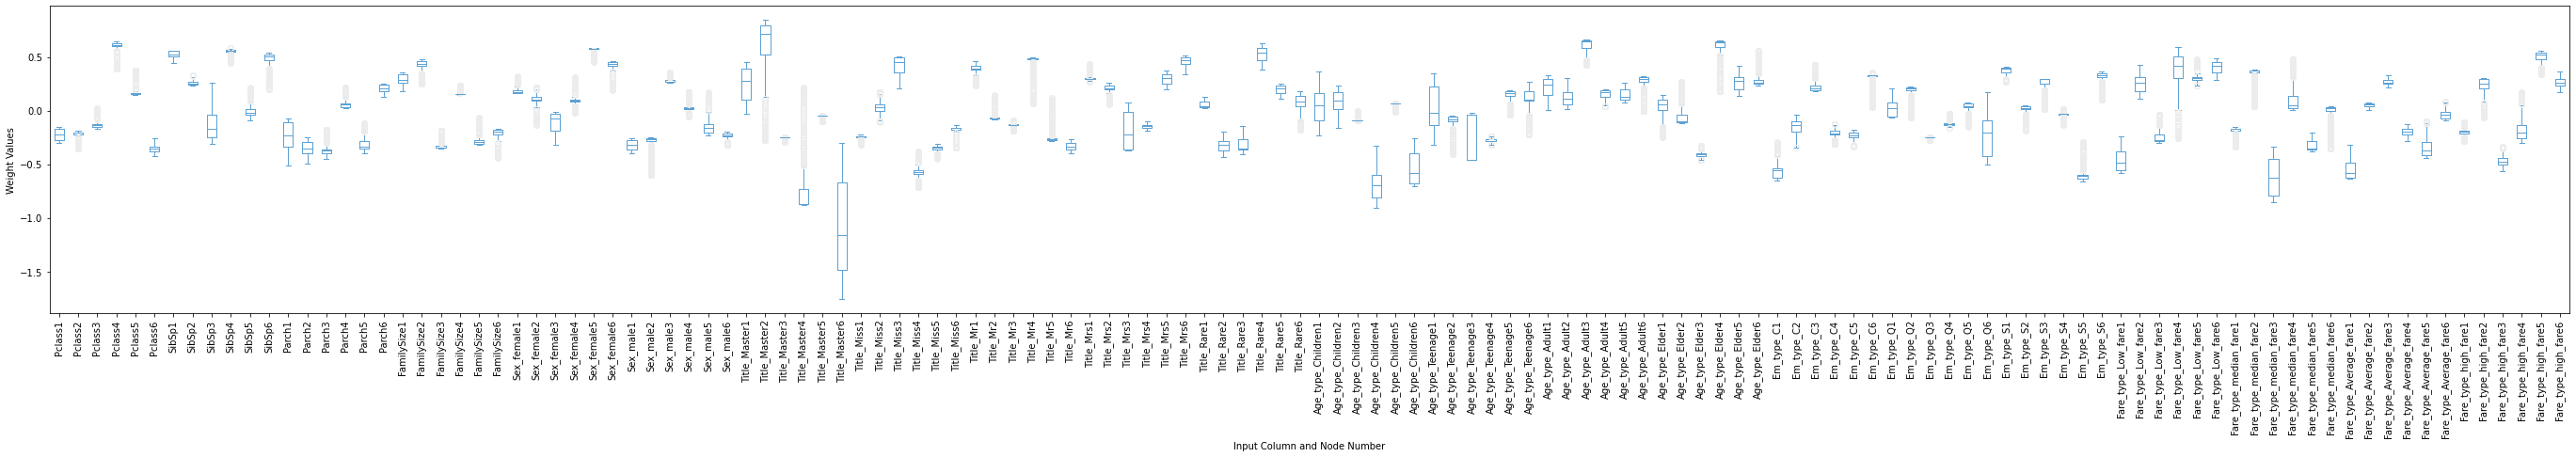

In [29]:
fig, ax = plt.subplots(figsize=(48,6))

for i, field in enumerate(all_fields):
    generate_box_plot(ax, field, darker, COLUMNS[i], i * 6, showfliers=True)
for label in ax.get_xticklabels():
    label.set_rotation(90)

In [30]:
def get_group_by_node(index: int) -> List:
    group = []
    for i in list(history.keys()):
        group.append(history[i][index])
    return group

In [31]:
group_one = get_group_by_node(0)
group_two = get_group_by_node(1)
group_three = get_group_by_node(2)
group_four = get_group_by_node(3)
group_five = get_group_by_node(4)
group_six = get_group_by_node(5)

In [32]:
import math
from statistics import mean, stdev
from scipy.stats import norm

def plot_stds(group):
    fig, ax = plt.subplots(figsize=(16,6))
    domain = np.linspace(-2,2,1000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    colors = [darker for _ in range(len(group))]
    for mu, std, color in zip(means, stds, colors):
        probs = norm.pdf(domain, mu, std)
        ax.plot(domain, probs, color=color)
        ax.set_xlabel("Weight")
        ax.set_ylabel("Probability Density")

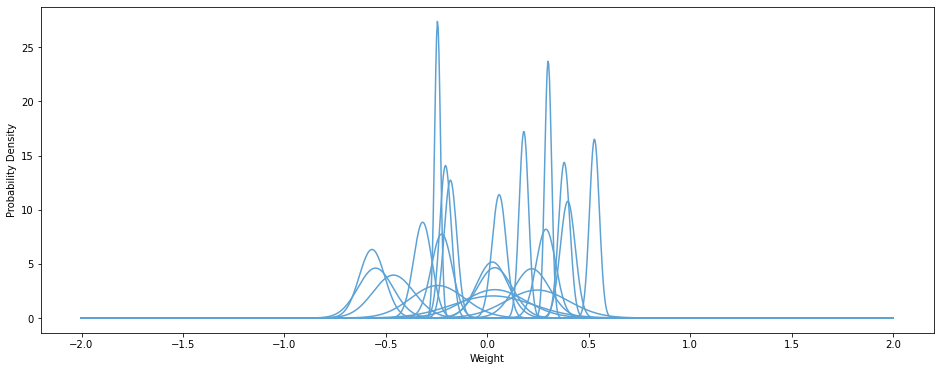

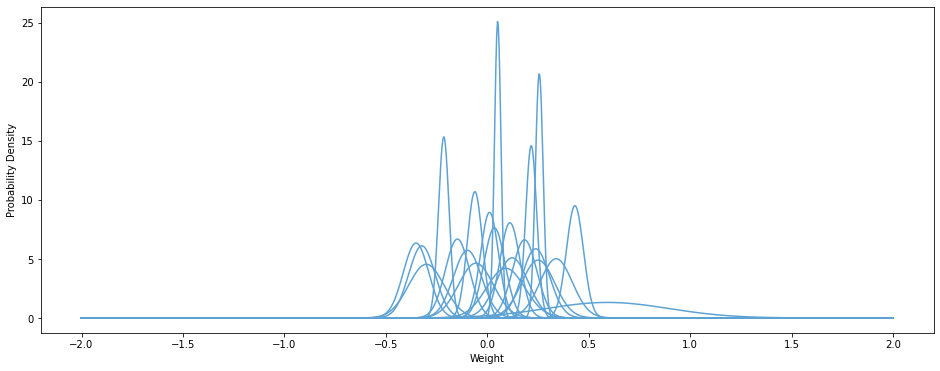

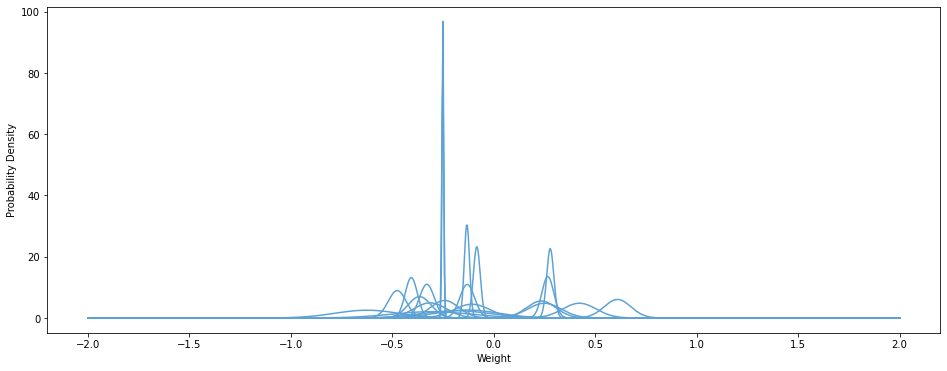

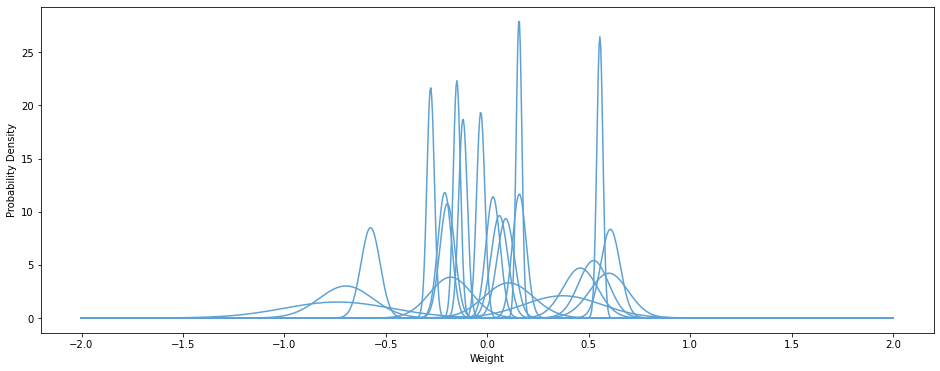

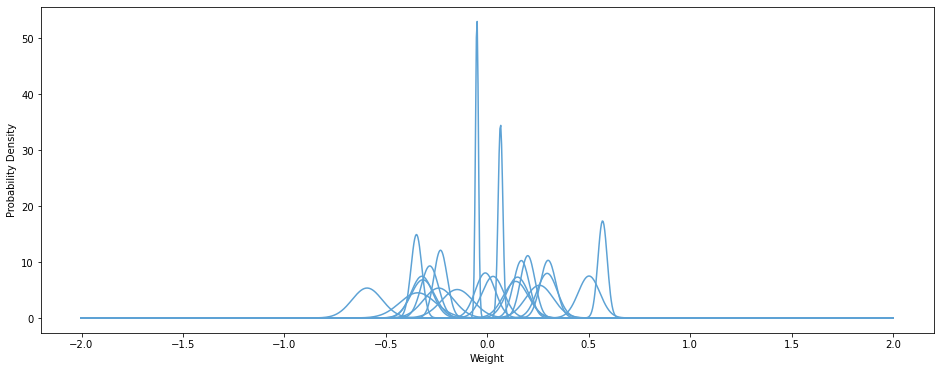

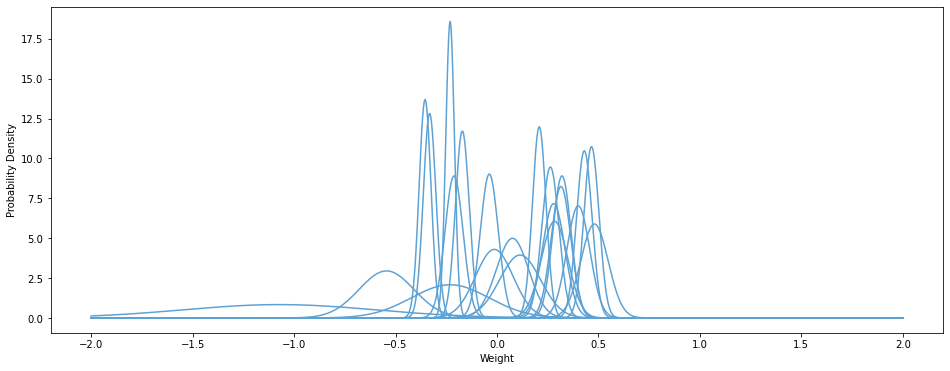

In [37]:
plot_stds(group_one)
plot_stds(group_two)
plot_stds(group_three)
plot_stds(group_four)
plot_stds(group_five)
plot_stds(group_six)

In [38]:
def get_props(group):
    domain = np.linspace(-2,2,1000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    results = []
    for mu, std in zip(means, stds):
        values = []
        probs = norm.pdf(domain, mu, std)
        for prob in probs:
            if math.floor(prob) != 0:
                values.append(prob)
        results.append(values)
    return results

In [45]:
groups = [group_one, group_two, group_three, group_four, group_five]
all_probs = [get_props(group) for group in groups]
all_probs

[[[1.1076016612034427,
   1.2875605500696448,
   1.4877160575886805,
   1.7086014276683819,
   1.9504274691523067,
   2.213029331707816,
   2.495817703973583,
   2.797736942203654,
   3.1172326712839227,
   3.4522313079567013,
   3.8001337272458873,
   4.1578249236114955,
   4.521701012924897,
   4.887714293728961,
   5.2514363594024385,
   5.608138458295348,
   5.952887475358627,
   6.280655100146932,
   6.586436998832929,
   6.86537816815868,
   7.11290015964559,
   7.324825558802573,
   7.497495012931476,
   7.627872237091021,
   7.7136327922169725,
   7.7532330097878,
   7.745956207741428,
   7.691934264426516,
   7.592143643212131,
   7.448376035188256,
   7.2631848531500305,
   7.039809809349907,
   6.782082689274405,
   6.494318148709228,
   6.1811938769912205,
   5.8476247636633065,
   5.498635770538937,
   5.139238052050008,
   4.774312502198751,
   4.408504366098337,
   4.046131876268175,
   3.69111110256636,
   3.346898386474654,
   3.016450911393261,
   2.702205183196896,
 

In [46]:
def barrage(all_probs, columns: int):
    res = {i: {"len": 0, "max": 0, "sum": 0, "mean": 0, "stdev": 0} for i in range(columns)}
    for probs in all_probs:
        for i, prob in enumerate(probs):
            res[i]["len"] += len(prob)
            res[i]["max"] += max(prob)
            res[i]["sum"] += sum(prob)
            res[i]["mean"] += mean(prob)
            res[i]["stdev"] += stdev(prob)
    return res

In [50]:
res = barrage(all_probs, len(COLUMNS))
for i in range(len(COLUMNS)):
    res[COLUMNS[i]] = res.pop(i)
res

{'Pclass': {'len': 214,
  'max': 52.665109258104856,
  'sum': 1209.2819402030343,
  'mean': 29.24593155403148,
  'stdev': 16.409552993223386},
 'SibSp': {'len': 227,
  'max': 74.29237341629351,
  'sum': 1185.5919010271018,
  'mean': 38.69234346325637,
  'stdev': 24.28285153823949},
 'Parch': {'len': 315,
  'max': 32.780711085189616,
  'sum': 1166.3178945577274,
  'mean': 20.004232380980106,
  'stdev': 9.310330748997144},
 'FamilySize': {'len': 197,
  'max': 65.90532907033041,
  'sum': 1211.6043647248748,
  'mean': 35.42387422358649,
  'stdev': 21.22958438642079},
 'Sex_female': {'len': 228,
  'max': 56.45570703433019,
  'sum': 1201.297585258501,
  'mean': 30.68746973153028,
  'stdev': 17.87304411689983},
 'Sex_male': {'len': 253,
  'max': 52.554514228242155,
  'sum': 1189.9773635034658,
  'mean': 29.025452650168212,
  'stdev': 16.392973984952864},
 'Title_Master': {'len': 356,
  'max': 138.2470945202885,
  'sum': 998.521228004932,
  'mean': 64.82070358335667,
  'stdev': 50.421427831608

In [52]:
df = pd.DataFrame(res)
df

,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
len,214.000000,227.000000,315.000000,197.000000,228.000000,253.000000,356.000000,225.000000,241.000000,238.000000,...,381.000000,303.000000,331.000000,259.000000,216.000000,245.000000,379.000000,359.000000,245.000000,283.000000
max,52.665109,74.292373,32.780711,65.905329,56.455707,52.554514,138.247095,63.243858,61.836821,70.946222,...,38.006637,34.639560,32.551155,42.475303,134.711801,52.793403,26.979620,31.056962,58.505522,40.219942
sum,1209.281940,1185.591901,1166.317895,1211.604365,1201.297585,1189.977364,998.521228,1202.407999,1195.753781,1181.042434,...,1102.275462,1179.288074,1167.765493,1192.969062,1204.345307,1194.572053,1127.072634,1138.130226,1190.783838,1184.324688
mean,29.245932,38.692343,20.004232,35.423874,30.687470,29.025453,64.820704,33.501479,33.027903,36.677143,...,21.583647,20.807722,19.570831,24.649942,56.896504,29.185305,16.928746,18.988150,31.806667,23.287298
stdev,16.409553,24.282852,9.310331,21.229584,17.873044,16.392974,50.421428,20.377640,19.977040,23.249659,...,11.446229,10.012200,9.351939,12.722720,48.741635,16.496790,7.366495,8.743435,18.514276,12.037880


<AxesSubplot:>

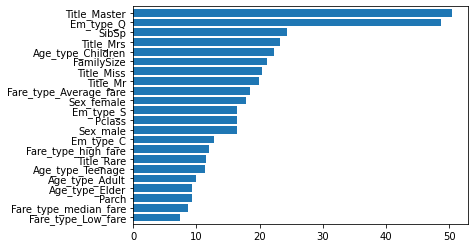

In [63]:
pd.Series(df.loc["stdev"],df.columns).sort_values(ascending=True).plot.barh(width=0.8)

In [65]:
df[["Title_Master", "Em_type_Q"]]

,Title_Master,Em_type_Q
len,356.000000,216.000000
max,138.247095,134.711801
sum,998.521228,1204.345307
mean,64.820704,56.896504
stdev,50.421428,48.741635
